In [ ]:
!git clone https://github.com/MarcoForte/FBA-Matting.git

Cloning into 'FBA-Matting'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 72 (delta 19), reused 45 (delta 10), pack-reused 0
Unpacking objects: 100% (72/72), done.


**Make sure runtime type is GPU**

In [ ]:
%cd FBA-Matting

/content/FBA-Matting


In [ ]:
from demo import np_to_torch, pred, scale_input
from dataloader import read_image, read_trimap
from networks.models import build_model
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
class Args:
  encoder = 'resnet50_GN_WS'
  decoder = 'fba_decoder'
  weights = 'FBA.pth'
args=Args()
try:
    model = build_model(args)
except:
    !gdown  https://drive.google.com/uc?id=1T_oiKDE_biWf2kqexMEN7ObWqtXAzbB1
    model = build_model(args)

modifying input layer to accept 11 channels
Downloading...
From: https://drive.google.com/uc?id=1T_oiKDE_biWf2kqexMEN7ObWqtXAzbB1
To: /content/FBA-Matting/FBA.pth
139MB [00:06, 22.5MB/s]
modifying input layer to accept 11 channels


In [ ]:
image = read_image('./examples/images/troll.png')
trimap = read_trimap('./examples/trimaps/troll.png')

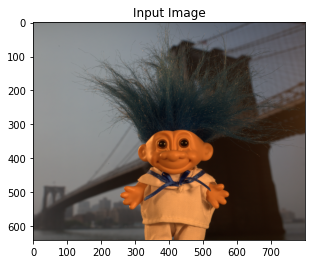

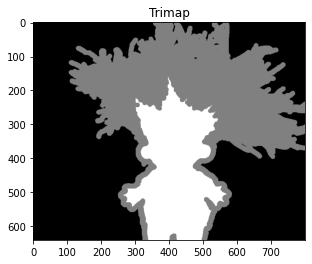

In [ ]:
plt.title('Input Image')
plt.imshow(image)
plt.show()

# transform two channel trimap back to single channel
trimap_im =  trimap[:,:,1] + (1-np.sum(trimap,-1))/2
plt.title('Trimap')
plt.imshow(trimap_im, cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
fg, bg, alpha = pred(image, trimap, model)

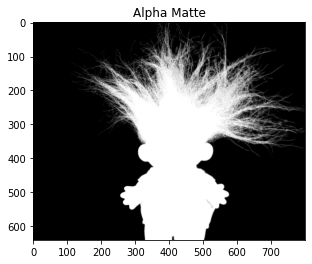

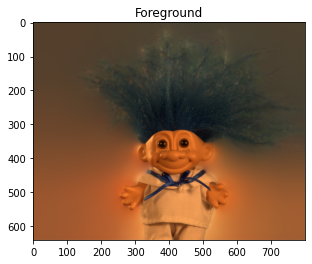

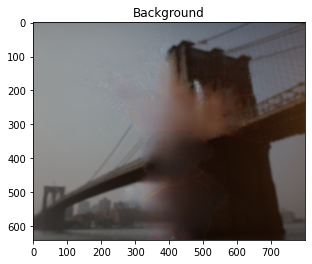

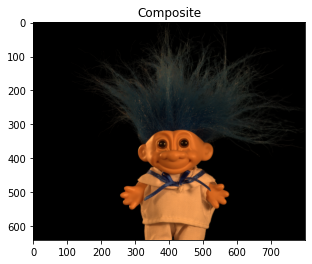

In [ ]:
plt.title('Alpha Matte')
plt.imshow(alpha, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.title('Foreground')
plt.imshow(fg)
plt.show()
plt.title('Background')
plt.imshow(bg)
plt.show()
plt.title('Composite')
plt.imshow(fg*alpha[:,:,None])
plt.show()